In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from mlinsights.mlmodel import ClassifierAfterKMeans

In [112]:
data = pd.read_csv('train_clustering.csv', header=None, names=['Longitude', 'Latitude', 'Especie'])
coords = data.iloc[:,0:2].values
species = data.iloc[:,2].values
data

,Longitude,Latitude,Especie
0,4.419330,-4.364950,0.0
1,6.070196,1.488915,0.0
2,2.007118,-7.977385,0.0
3,-0.293764,-3.819495,1.0
4,-2.550041,-0.001893,1.0
...,...,...,...
17492,-1.876277,1.174661,1.0
17493,2.165510,9.575764,0.0
17494,-1.449859,0.357157,1.0
17495,3.125019,-4.056496,1.0


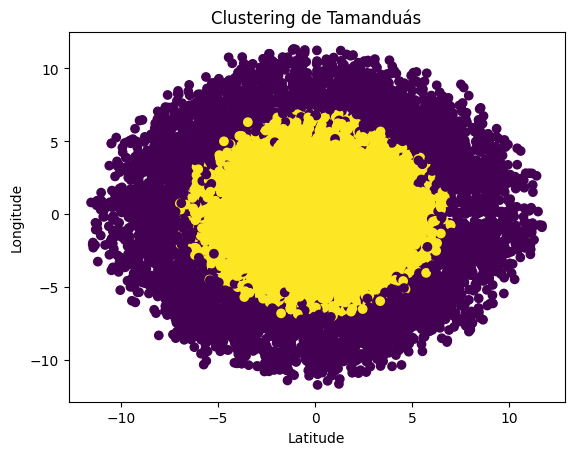

In [150]:
plt.scatter(coords[:,0], coords[:,1], c=species, cmap='viridis')
plt.title('Clustering de Tamanduás')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [113]:
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None) :
        return self

    def transform(self, X):

        X['Especie'] = X['Especie'].replace([0.0, 1.0],['0', '1'])
        
        return X
    
prep_pipeline = Pipeline([("feature_encoder",FeatureEncoder())])

In [160]:
manipulated_data = prep_pipeline.fit_transform(data)
mspecies = manipulated_data.iloc[:,2].values
manipulated_data

,Longitude,Latitude,Especie
0,4.419330,-4.364950,0
1,6.070196,1.488915,0
2,2.007118,-7.977385,0
3,-0.293764,-3.819495,1
4,-2.550041,-0.001893,1
...,...,...,...
17492,-1.876277,1.174661,1
17493,2.165510,9.575764,0
17494,-1.449859,0.357157,1
17495,3.125019,-4.056496,1


In [161]:
clk = ClassifierAfterKMeans(e_solver='lbfgs', e_multi_class='multinomial')
clk.fit(coords, mspecies)

ClassifierAfterKMeans(c_algorithm='lloyd', c_copy_x=True,
    c_init='k-means++', c_max_iter=300, c_n_clusters=2,
    c_n_init='warn', c_random_state=None, c_tol=0.0001, c_verbose=0,
    e_C=1.0, e_class_weight=None, e_dual=False, e_fit_intercept=True,
    e_intercept_scaling=1, e_l1_ratio=None, e_max_iter=100,
    e_multi_class='multinomial', e_n_jobs=None, e_penalty='l2',
    e_random_state=None, e_solver='lbfgs', e_tol=0.0001, e_verbose=0,
    e_warm_start=False)

In [152]:
new_data = pd.read_csv('test_clustering.csv', header=None, names=['Longitude', 'Latitude', 'Especie'])
new_coords = new_data.iloc[:,0:2].values
new_data

,Longitude,Latitude,Especie
0,-4.753768,-4.009987,0.0
1,6.219942,3.996460,0.0
2,-2.020684,-9.518370,0.0
3,3.587862,-5.346669,1.0
4,-7.691550,5.543183,0.0
...,...,...,...
5019,-3.477928,-1.897474,1.0
5020,3.165994,2.288961,1.0
5021,-0.163297,0.549899,1.0
5022,-1.771768,1.983036,1.0


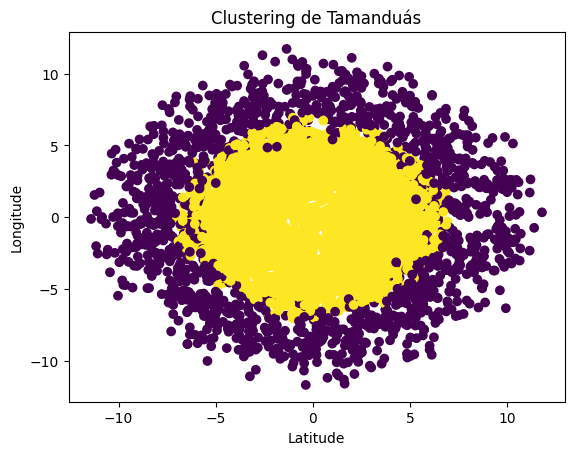

In [153]:
plt.scatter(new_coords[:,0], new_coords[:,1], c=new_data.iloc[:,2].values, cmap='viridis')
plt.title('Clustering de Tamanduás')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [154]:
mnew_data = prep_pipeline.fit_transform(new_data)
new_species = mnew_data.iloc[:,2].values

In [155]:
test_predictions = clk.predict(new_coords)
len(test_predictions)

5024

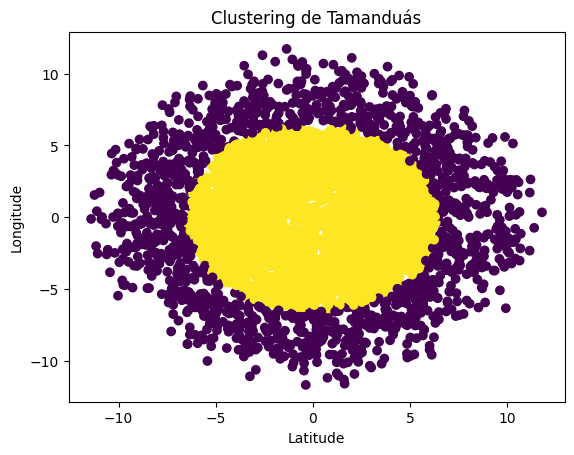

In [174]:
plt.scatter(new_coords[:,0], new_coords[:,1], c=[int(i) for i in test_predictions], cmap='viridis')
plt.title('Clustering de Tamanduás')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [156]:
correct_predictions = 0
for i in range(len(test_predictions)):
    if test_predictions[i] == new_species[i]:
        correct_predictions += 1
correct_predictions/len(test_predictions)

0.9484474522292994

In [165]:
real_data = pd.read_csv('validacao_clustering.csv', header=None, names=['Longitude', 'Latitude'])
real_coords = real_data.iloc[:,0:2].values
real_data

,Longitude,Latitude
0,-1.804051,-3.955724
1,-0.624053,1.104892
2,5.714674,3.445390
3,4.592273,0.107723
4,1.429722,-1.716809
...,...,...
2470,9.520511,-1.724569
2471,-3.872040,-4.284452
2472,0.536559,7.497277
2473,-2.942921,2.240680


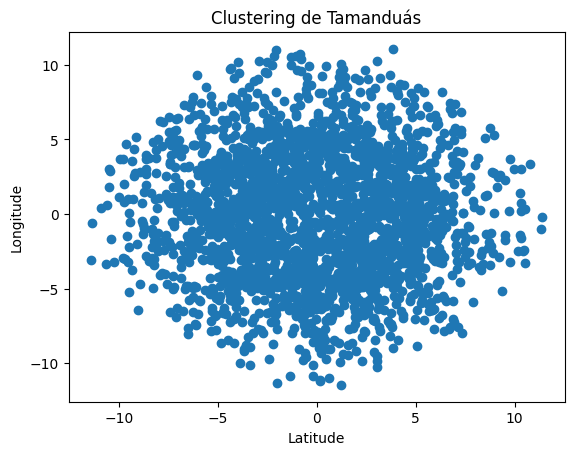

In [171]:
plt.scatter(real_coords[:,0], real_coords[:,1])
plt.title('Clustering de Tamanduás')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [169]:
real_predictions = clk.predict(real_coords)
real_predictions

array(['1', '1', '0', ..., '0', '1', '1'], dtype=object)

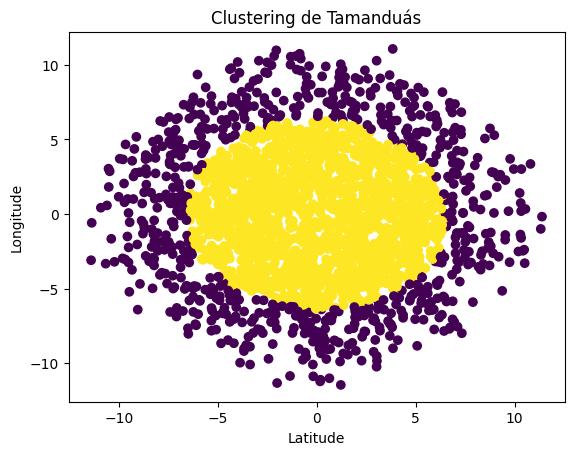

In [172]:
plt.scatter(real_coords[:,0], real_coords[:,1], c=[int(i) for i in real_predictions], cmap='viridis')
plt.title('Clustering de Tamanduás')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [173]:
real_predictions = [int(i) for i in real_predictions]
np.savetxt('results.txt', real_predictions, fmt='%d')